# Importing the necessary libraries

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

# Loading the dataset

In [205]:
data = pd.read_csv('diabetes.csv')

# Exploratory Data Analysis (EDA)

In [206]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [207]:
# Checking the shape of the dataset 
print(data.shape)

(768, 9)


In [208]:
# Summary statistics
print("\nDescriptive statistics for the numerical columns:")
data.describe()


Descriptive statistics for the numerical columns:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [209]:
# Checking the data types and non-null values
print("\nDataset Information:\n")
data.info()


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [210]:
# Checking for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())


Missing Values:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Checking for class imbalance

In [211]:
# Checking the distribution of the target variable
class_dist = data['Outcome'].value_counts()
print(class_dist)

Outcome
0    500
1    268
Name: count, dtype: int64


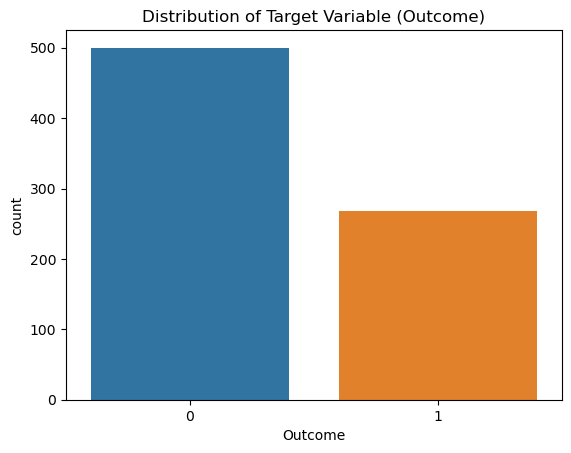

In [212]:
# Visualizing the distribution with a bar plot
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Target Variable (Outcome)')
plt.show()

In [213]:
# Calculating the ratio of the minority class
minority_class_ratio = class_dist.min() / class_dist.max()
print(f"Minority Class Ratio: {minority_class_ratio:.2f}")

Minority Class Ratio: 0.54


A minority class ratio significantly lower than 1 indicates an imbalanced dataset. Here, the minority class ratio is 0.54 meaning that the minority class is 54% of the majority class which indicates that the dataset is imbalanced.

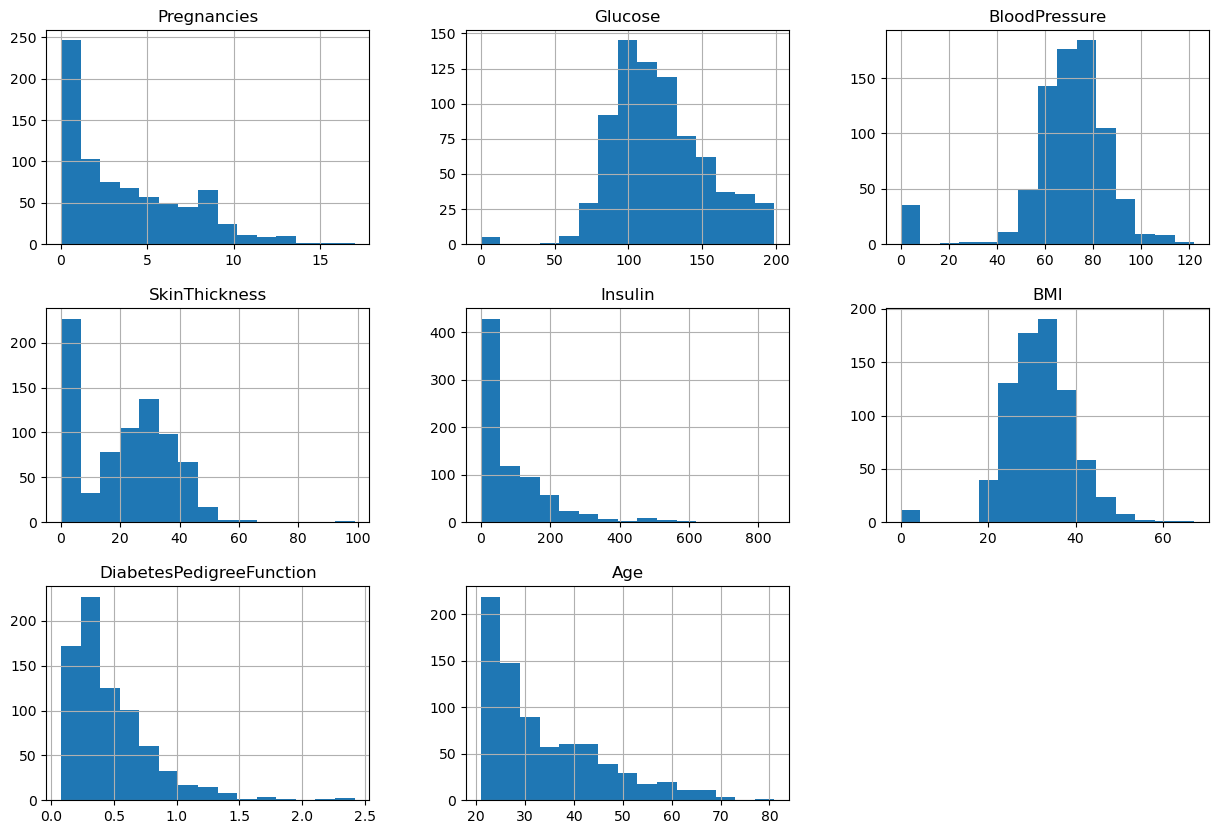

In [214]:
# Histograms for each feature
features = data.drop(columns='Outcome')  # Dropping the target column
features.hist(bins=15, figsize=(15,10))
plt.show()

The histograms of each feature reveal several important trends. **Pregnancies** is right-skewed, with most values concentrated between 0 and 5, and very few cases of women having more than 10 pregnancies. **Glucose** follows a somewhat normal distribution, with most values clustering between 100–150, though a few lower values might represent missing or erroneous data. **Blood Pressure** shows a mostly normal distribution but contains some unrealistic zero values, which need to be addressed. **Skin Thickness** has a significant number of zeros, likely indicating missing data, while non-zero values are right-skewed. **Insulin** also has many zeros, suggesting non-measurement or missing data, and the non-zero values show a long tail with some high outliers. **BMI** appears normally distributed around a peak of 30, with few outliers. **Diabetes Pedigree Function** is right-skewed, with most values falling between 0.0 and 1.0. Lastly, **Age** is also right-skewed, with most individuals younger than 50, though a few older individuals above 70 are present, which is reasonable for a diabetes dataset.

Several issues need addressing, particularly the presence of zeros in features like **Glucose**, **Blood Pressure**, **Skin Thickness**, **Insulin**, and **BMI**. These zero values, which are biologically unrealistic for features like Glucose and Blood Pressure, likely indicate missing or incorrect data. **Skin Thickness** and **Insulin** also show a high number of zeros, which are likely placeholders for missing values. Additionally, **BMI** contains a few implausible zero values. These features require appropriate imputation strategies to handle the missing data. After resolving these issues, **scaling** will be important to ensure that all features are on consistent ranges, which will improve the performance of models like the Perceptron or other machine learning algorithms.

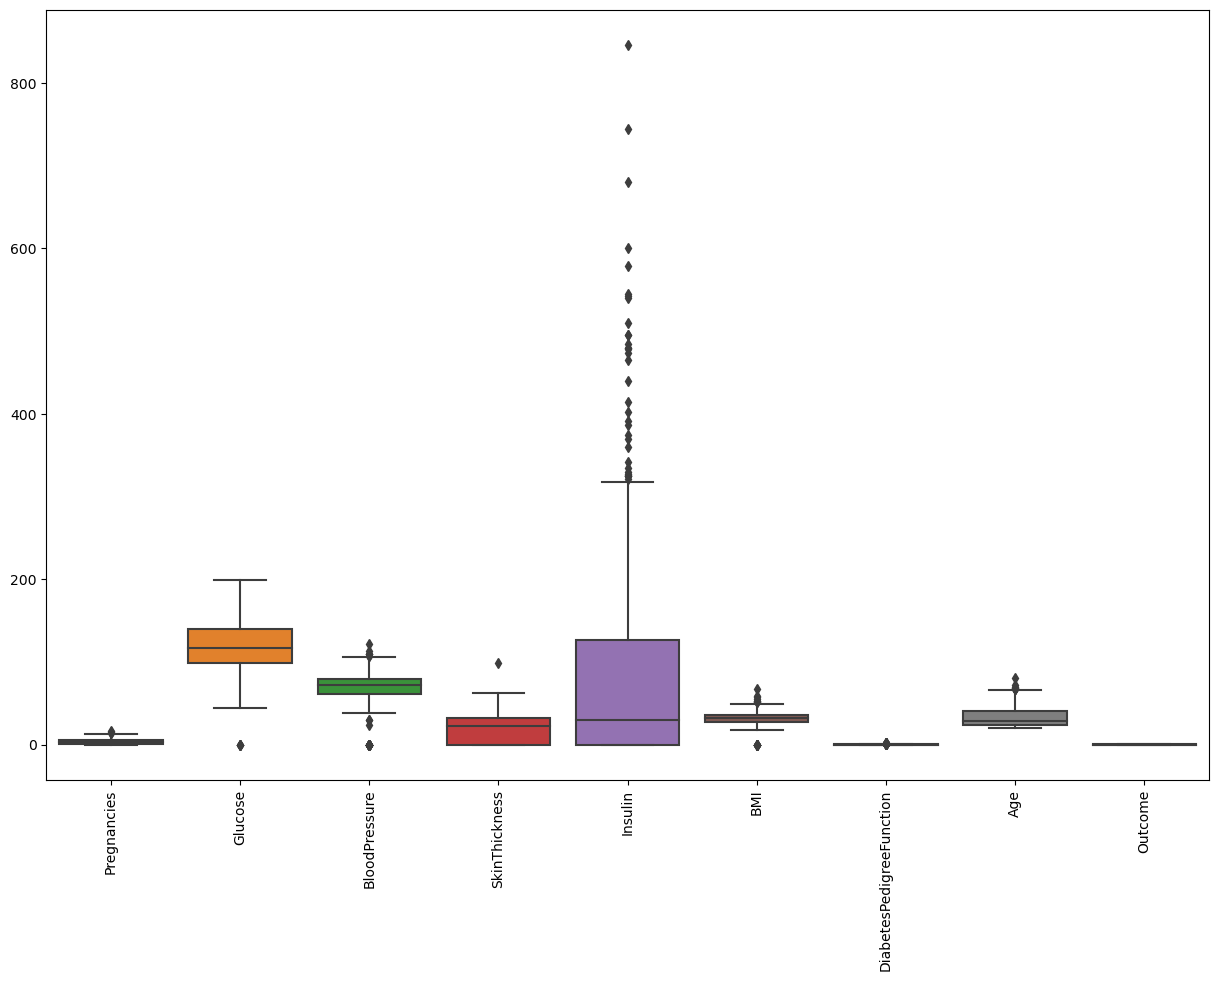

In [215]:
# Box plots to check for outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

The boxplot analysis shows that most features, like Pregnancies, Glucose, Blood Pressure, Skin Thickness, BMI, Diabetes Pedigree Function, and Age, have only a few mild outliers that don't need to be removed or changed. The only feature with a significant number of outliers is **Insulin**, which displays a long-tailed distribution. However, it may not be necessary to address these outliers because extreme insulin levels can be expected in a medical dataset related to diabetes, and removing or capping these values could result in a loss of important information relevant to the disease's progression. Retaining these outliers allows the model to capture a more complete picture of the variability in patients' insulin levels, which could be critical for accurately predicting outcomes.

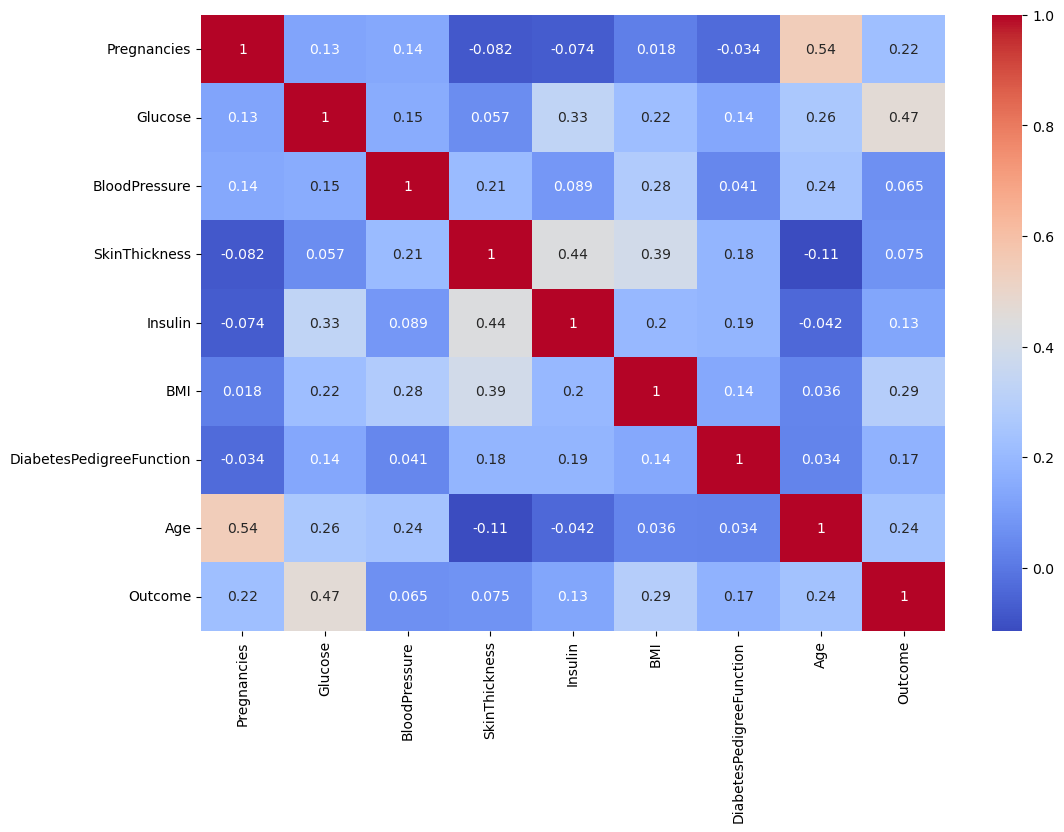

In [216]:
# Correlation matrix
corr_matrix = data.corr()

# Plotting the heatmap of correlations
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation matrix shows that none of the features in the dataset are highly related to each other. The highest correlation is 0.54 between Age and Pregnancies, and there are moderate correlations between Insulin and Skin Thickness (0.44), and Glucose and Insulin (0.33). Glucose has the strongest connection with the outcome (0.47), followed by BMI (0.29) and Age (0.24). Since no features have very strong correlations (close to 1), there’s no need to remove or combine features. Each feature adds its own value, so instead of changing the features, we should focus on scaling them to improve the model’s performance.

# Data Pre-processing

## Imputation

In [217]:
# Replacing the 0s with NaN for 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Imputing the NaN values with the median value
data.fillna(data.median(), inplace=True)

For features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI (which have zero values) , I replaced the zero values with the median value which is a more realistic estimate.

## Standardization

In [218]:
# Standardize the features
features = data.drop(columns='Outcome')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Reconstructing the DataFrame with scaled features
data_scaled = pd.DataFrame(scaled_features, columns=features.columns)
data_scaled['Outcome'] = data['Outcome']  

 Perceptron models perform better when the input features are on a similar scale. 

In [219]:
# Converting 0 and 1 labels to -1 and +1
data_scaled['Outcome'] = data_scaled['Outcome'].apply(lambda x: 1 if x == 1 else -1)

I converted the labels to `-1` and `1` for the perceptron algorithm because this label convention allows for more effective weight updates during training. The perceptron’s update rule relies on the sign of the label to determine the direction of weight adjustments: adding the input vector for positive labels (`1`) and subtracting it for negative labels (`-1`). This ensures that the algorithm properly adjusts the decision boundary to separate the classes. Using labels like `0` and `1` would prevent these weight changes in cases where the true label is `0`, leading to inefficiencies and potentially stalling the learning process【13†source】【14†source】.

## Splitting the dataset

In [220]:
# Splitting the preprocessed dataset into train and test sets
X = data_scaled.drop(columns='Outcome')
y = data_scaled['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Implementation

## Implementing the Traditional Perceptron (Base Model)

In [221]:
# Converting to NumPy arrays 
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [222]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000, verbose=False):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.verbose = verbose  # Control printing/logging with verbose flag

    def _sign(self, x):
        """Activation function - sign function for Perceptron"""
        return np.where(x >= 0, 1, -1)

    def _update_weights(self, x_i, y_true):
        """Update the weights and bias using the perceptron rule without class weighting"""
        update = self.lr * y_true
        self.weights += update * x_i
        self.bias += update

    def fit(self, X, y):
        """Train the Perceptron model"""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._sign(linear_output)

                # Perceptron update rule without class weighting
                if y_predicted != y[idx]:
                    self._update_weights(x_i, y[idx])

            # Calculating accuracy after each epoch on training set
            y_train_pred = self.predict(X)
            accuracy = accuracy_score(y, y_train_pred)

            # If verbose, print the progress at each epoch
            if self.verbose:
                print(f"Epoch {epoch+1}/{self.n_iters}")
                print(f"Weights: {self.weights}")
                print(f"Bias: {self.bias}")
                print(f"Training Accuracy: {accuracy:.4f}")

    def predict(self, X):
        """Make predictions on input data X"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self._sign(linear_output)

# Training the Perceptron model with verbose=True to print each epoch
perceptron = Perceptron(learning_rate=0.01, n_iters=1000, verbose=True)
perceptron.fit(X_train, y_train)

# Making predictions
y_pred = perceptron.predict(X_test)

Epoch 1/1000
Weights: [ 0.03425555  0.04601441  0.02246727 -0.0064604   0.03463763  0.02673036
  0.00820352 -0.03427109]
Bias: -0.03
Training Accuracy: 0.7231
Epoch 2/1000
Weights: [ 0.03630492  0.04052843 -0.00336379 -0.01645853  0.03039142  0.04260999
 -0.01759577 -0.00237869]
Bias: -0.05
Training Accuracy: 0.7443
Epoch 3/1000
Weights: [ 0.01940722  0.04634315  0.01005906  0.01744263  0.02861401  0.03240664
  0.01883433 -0.01725354]
Bias: -0.03
Training Accuracy: 0.7541
Epoch 4/1000
Weights: [ 0.03768535  0.03560749  0.0064303   0.00593722  0.0163731   0.0432422
  0.01080455 -0.01490587]
Bias: -0.019999999999999997
Training Accuracy: 0.7345
Epoch 5/1000
Weights: [ 0.04864373  0.0383402   0.01037896  0.00276853  0.02521668  0.045295
  0.0061763  -0.0196012 ]
Bias: -0.04
Training Accuracy: 0.7443
Epoch 6/1000
Weights: [0.04111516 0.04985664 0.00445597 0.01036717 0.07247713 0.03530239
 0.02098609 0.00020496]
Bias: -0.009999999999999997
Training Accuracy: 0.7410
Epoch 7/1000
Weights: [ 2

In [223]:
# Accuracy
print("Perceptron Test Accuracy:", accuracy_score(y_test, y_pred))

Perceptron Test Accuracy: 0.8181818181818182


In [224]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.83      0.90      0.86        99
           1       0.79      0.67      0.73        55

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.79       154
weighted avg       0.82      0.82      0.81       154



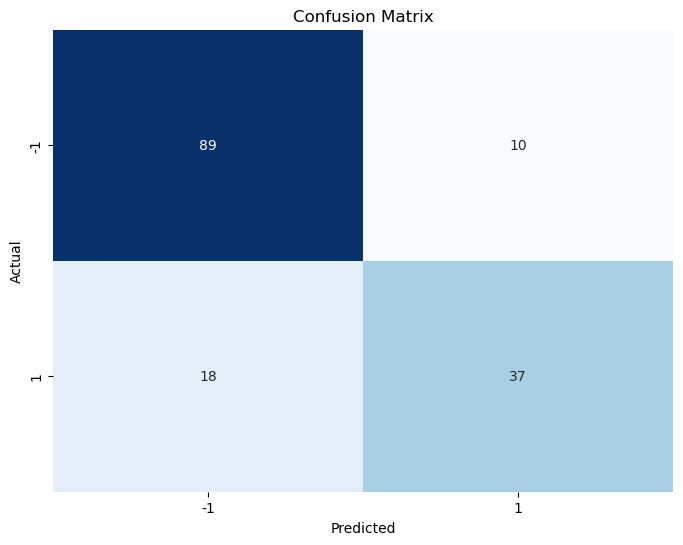

In [225]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix for the traditional Perceptron without class weighting shows that the model performs well on the majority class (class -1), correctly classifying 89 out of 99 instances, but struggles with the minority class (class 1). Out of 55 instances of class 1, the model correctly classifies 37 but misclassifies 18 as class -1. This imbalance in performance suggests that the model is biased toward the majority class, resulting in lower recall for the minority class, which is a common issue when dealing with imbalanced datasets.

# Experimental Analysis

## Test 1: Implementing the Traditional Perceptron (base model) with Class Weighting

In [226]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000, verbose=False):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.class_weights = None  # Adding class_weights to the initialization
        self.verbose = verbose  # Control printing/logging with verbose flag

    def _sign(self, x):
        """Activation function - sign function for Perceptron"""
        return np.where(x >= 0, 1, -1)

    def _calculate_class_weights(self, y):
        """Compute class weights based on the class distribution"""
        n_class_0 = np.sum(y == -1)
        n_class_1 = np.sum(y == 1)
        self.class_weights = {1: n_class_0 / n_class_1, -1: 1.0}

    def _update_weights(self, x_i, y_true):
        """Update the weights and bias using the perceptron rule with class weighting"""
        update = self.lr * self.class_weights[y_true] * y_true
        self.weights += update * x_i
        self.bias += update

    def fit(self, X, y):
        """Train the Perceptron model"""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Calculating class weights
        self._calculate_class_weights(y)

        for epoch in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._sign(linear_output)

                # Perceptron update rule with class weighting
                if y_predicted != y[idx]:
                    self._update_weights(x_i, y[idx])

            # Calculate accuracy after each epoch on training set
            y_train_pred = self.predict(X)
            accuracy = accuracy_score(y, y_train_pred)

            # If verbose, print the progress at each epoch
            if self.verbose:
                print(f"Epoch {epoch+1}/{self.n_iters}")
                print(f"Weights: {self.weights}")
                print(f"Bias: {self.bias}")
                print(f"Training Accuracy: {accuracy:.4f}")

    def predict(self, X):
        """Make predictions on input data X"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self._sign(linear_output)

# Training the Perceptron model with verbose=True to print each epoch
perceptron = Perceptron(learning_rate=0.01, n_iters=1000, verbose=True)
perceptron.fit(X_train, y_train)

# Making predictions
y_pred = perceptron.predict(X_test)

Epoch 1/1000
Weights: [ 0.02821022  0.07385749 -0.01272    -0.00146561  0.13822563  0.07641787
  0.05843386 -0.03733654]
Bias: 0.013145539906103218
Training Accuracy: 0.7166
Epoch 2/1000
Weights: [ 0.0267652   0.06814208  0.02322006  0.03239421  0.03065756  0.06974735
  0.00952632 -0.01352428]
Bias: -0.014319248826291209
Training Accuracy: 0.7248
Epoch 3/1000
Weights: [ 0.04897151  0.0291943  -0.00166092 -0.00973012  0.12758582  0.05204368
 -0.01545998 -0.02179161]
Bias: 0.004694835680750985
Training Accuracy: 0.6857
Epoch 4/1000
Weights: [ 0.04330908  0.05807862 -0.03050506 -0.03052822  0.03627391  0.08031245
 -0.01029837 -0.0143454 ]
Bias: -0.027464788732394628
Training Accuracy: 0.7248
Epoch 5/1000
Weights: [ 0.05754047  0.03685047  0.01092848 -0.01741842  0.13490446  0.05729096
  0.02471342 -0.01849693]
Bias: -0.01845070422535245
Training Accuracy: 0.7248
Epoch 6/1000
Weights: [ 0.01486735  0.06000147 -0.02172105 -0.00061181  0.12996857  0.04018055
 -0.00269923 -0.02021254]
Bias: -

In [227]:
# Accuracy
print("Perceptron Test Accuracy:", accuracy_score(y_test, y_pred))

Perceptron Test Accuracy: 0.7597402597402597


In [228]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.88      0.73      0.80        99
           1       0.62      0.82      0.71        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.79      0.76      0.76       154



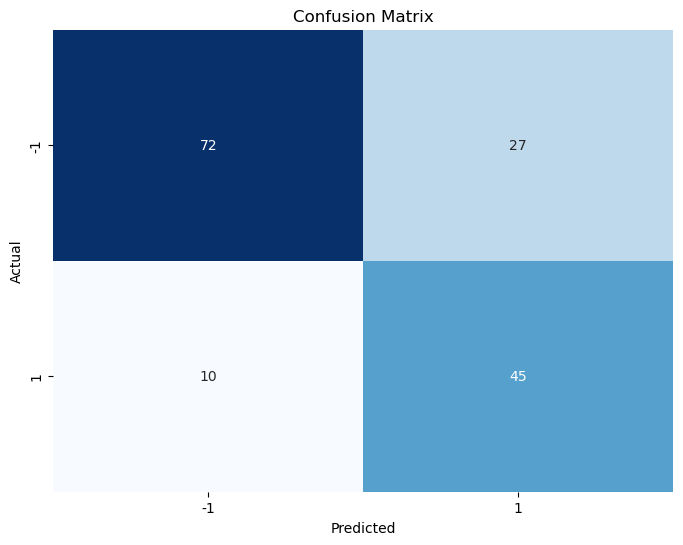

In [229]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix for the Perceptron model with class weighting shows a significant improvement in the model's ability to correctly classify the minority class (class 1), where 45 out of 55 instances were correctly predicted, raising the recall substantially. However, this improvement comes at the cost of a slight drop in performance for the majority class (class -1), where 27 out of 99 instances were misclassified. Despite a small reduction in overall accuracy, class weighting is highly beneficial because it balances the model's performance across both classes. In imbalanced datasets like this one, a model without class weighting tends to overlook the minority class, leading to poorer recall and F1-score. By penalizing misclassifications of the minority class more heavily, class weighting ensures better detection of critical cases like diabetes, where under-detecting the minority class (positive cases) can have serious consequences.

## Test 2: Implementing the Traditional Perceptron (Base Model) with SMOTE

In [230]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000, verbose=False):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.verbose = verbose  # Control printing/logging with verbose flag

    def _sign(self, x):
        """Activation function - sign function for Perceptron"""
        return np.where(x >= 0, 1, -1)

    def _update_weights(self, x_i, y_true):
        """Update the weights and bias using the perceptron rule"""
        update = self.lr * y_true
        self.weights += update * x_i
        self.bias += update

    def fit(self, X, y):
        """Train the Perceptron model"""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._sign(linear_output)

                # Perceptron update rule
                if y_predicted != y[idx]:
                    self._update_weights(x_i, y[idx])

            # Calculate accuracy after each epoch on training set
            y_train_pred = self.predict(X)
            accuracy = accuracy_score(y, y_train_pred)

            # If verbose, print the progress at each epoch
            if self.verbose:
                print(f"Epoch {epoch+1}/{self.n_iters}")
                print(f"Weights: {self.weights}")
                print(f"Bias: {self.bias}")
                print(f"Training Accuracy: {accuracy:.4f}")

    def predict(self, X):
        """Make predictions on input data X"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self._sign(linear_output)

# SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Training the Perceptron with the resampled dataset
perceptron = Perceptron(learning_rate=0.01, n_iters=1000, verbose=True)
perceptron.fit(X_resampled, y_resampled)

# Making predictions on the test set
y_pred = perceptron.predict(X_test)

Epoch 1/1000
Weights: [ 0.01249337  0.02951542 -0.00258951 -0.01927637  0.01548008  0.02856585
  0.00098176 -0.00896088]
Bias: 0.06000000000000001
Training Accuracy: 0.5449
Epoch 2/1000
Weights: [ 0.02273875  0.04580877 -0.01345902 -0.01116413  0.06419197  0.03024875
 -0.00410519  0.0077095 ]
Bias: 0.06000000000000001
Training Accuracy: 0.6945
Epoch 3/1000
Weights: [ 0.00227065  0.02525771 -0.01299675 -0.01188414 -0.00065831  0.0215163
 -0.00517765  0.00213397]
Bias: 0.04000000000000001
Training Accuracy: 0.5574
Epoch 4/1000
Weights: [ 0.01040265  0.04536808 -0.01089929  0.00670122  0.00259204  0.03957745
  0.0053082  -0.00543316]
Bias: 0.06000000000000001
Training Accuracy: 0.6484
Epoch 5/1000
Weights: [ 0.00729771  0.02353441 -0.017444   -0.00307543  0.01191954  0.02149419
 -0.00675704  0.00144351]
Bias: 0.05000000000000001
Training Accuracy: 0.5611
Epoch 6/1000
Weights: [ 0.01611957  0.02886042 -0.00857343 -0.00560508  0.04975193  0.03486694
 -0.00768454  0.01672605]
Bias: 0.07
Trai

In [231]:
# Printing accuracy and classification report
print("Accuracy with SMOTE:", accuracy_score(y_test, y_pred))

Accuracy with SMOTE: 0.4675324675324675


In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.95      0.18      0.31        99
           1       0.40      0.98      0.57        55

    accuracy                           0.47       154
   macro avg       0.67      0.58      0.44       154
weighted avg       0.75      0.47      0.40       154



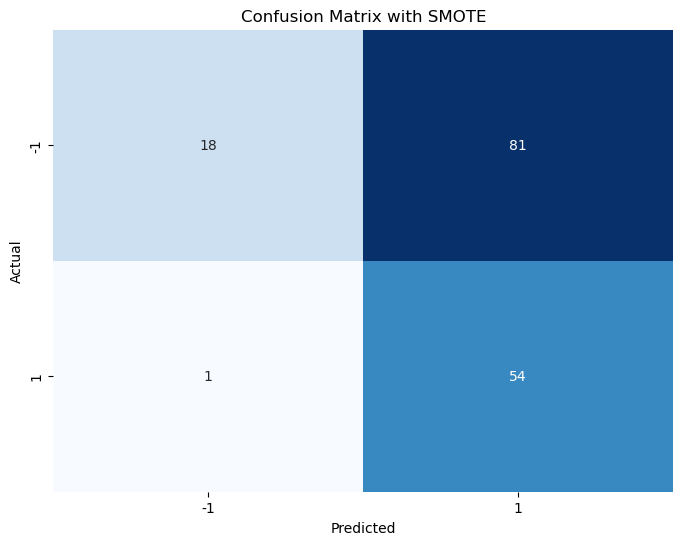

In [233]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with SMOTE')
plt.show()

The application of SMOTE (Synthetic Minority Over-sampling Technique) to the Perceptron model led to a significant improvement in recall for the minority class (class 1), reaching 98%. However, this came at the cost of severely reduced performance on the majority class (class -1), where recall dropped to 18%. As a result, the overall accuracy decreased to 46.75%. In comparison, the traditional algorithm without class weighting performed well for the majority class but struggled with the minority class, while class weighting balanced performance across both classes with a slight drop in overall accuracy. The primary issue with SMOTE is that it caused the model to overfit to the synthetic minority samples, resulting in poor generalization to the original majority class. Although SMOTE is effective in improving minority class recall, it highlights the need for careful tuning to avoid such overcompensation, which can negatively impact overall performance.

## Test 3: Experimenting with different iterations (epochs) for the Perceptron model


Training with 1000 iterations:
Test Accuracy with 1000 iterations: 0.7597
              precision    recall  f1-score   support

          -1       0.88      0.73      0.80        99
           1       0.62      0.82      0.71        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.79      0.76      0.76       154



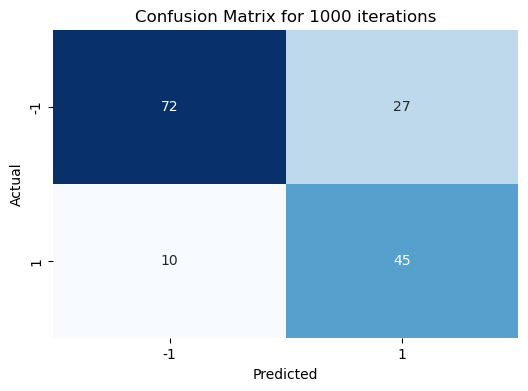


Training with 1200 iterations:
Test Accuracy with 1200 iterations: 0.7532
              precision    recall  f1-score   support

          -1       0.88      0.72      0.79        99
           1       0.62      0.82      0.70        55

    accuracy                           0.75       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.75      0.76       154



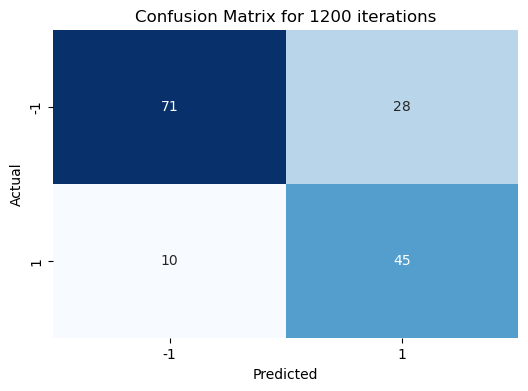


Training with 1300 iterations:
Test Accuracy with 1300 iterations: 0.7597
              precision    recall  f1-score   support

          -1       0.87      0.74      0.80        99
           1       0.63      0.80      0.70        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.76      0.76       154



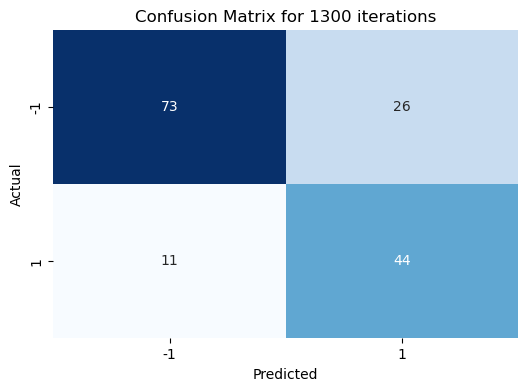


Training with 1400 iterations:
Test Accuracy with 1400 iterations: 0.7273
              precision    recall  f1-score   support

          -1       0.85      0.70      0.77        99
           1       0.59      0.78      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.73      0.73       154



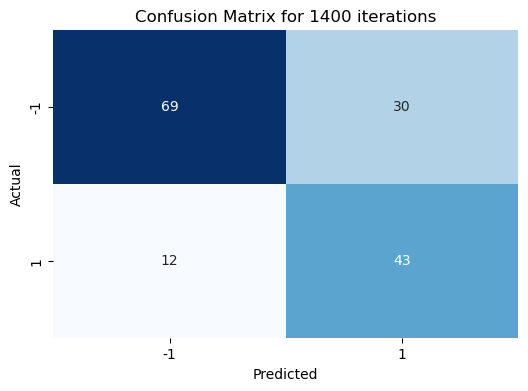


Training with 1500 iterations:
Test Accuracy with 1500 iterations: 0.7403
              precision    recall  f1-score   support

          -1       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



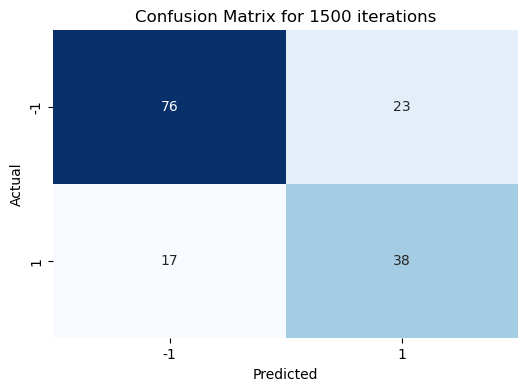

Test Accuracy for different iterations:  {1000: 0.7597402597402597, 1200: 0.7532467532467533, 1300: 0.7597402597402597, 1400: 0.7272727272727273, 1500: 0.7402597402597403}

Best iteration to use: 1000 with accuracy: 0.7597


In [234]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000, verbose=False, class_weights=None):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.verbose = verbose
        self.class_weights = class_weights  # Allow setting custom class weights

    def _sign(self, x):
        """Activation function - sign function for Perceptron"""
        return np.where(x >= 0, 1, -1)

    def _calculate_class_weights(self, y):
        """Calculate class weights based on the class distribution"""
        if self.class_weights is None:
            n_class_0 = np.sum(y == -1)
            n_class_1 = np.sum(y == 1)
            self.class_weights = {1: n_class_0 / n_class_1, -1: 1.0}

    def _update_weights(self, x_i, y_true):
        """Update the weights and bias using the perceptron rule with class weighting"""
        update = self.lr * self.class_weights[y_true] * y_true
        self.weights += update * x_i
        self.bias += update

    def fit(self, X, y):
        """Train the Perceptron model"""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Calculate class weights based on the distribution of y
        self._calculate_class_weights(y)

        for epoch in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._sign(linear_output)

                if y_predicted != y[idx]:
                    self._update_weights(x_i, y[idx])

            if self.verbose:
                y_train_pred = self.predict(X)
                accuracy = accuracy_score(y, y_train_pred)
                print(f"Epoch {epoch+1}/{self.n_iters}, Training Accuracy: {accuracy:.4f}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._sign(linear_output)


# Experimenting with different iteration (epoch) values
iterations = [1000, 1200, 1300, 1400, 1500]
results = {}
best_iter = None
best_accuracy = 0

for iters in iterations:
    print(f"\nTraining with {iters} iterations:")
    # Class weights can be manually passed, or calculated automatically inside the class
    perceptron = Perceptron(learning_rate=0.01, n_iters=iters, verbose=False, class_weights=None)
    
    perceptron.fit(X_train, y_train)  # Remove .values since they are already NumPy arrays
    
    y_pred = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[iters] = accuracy
    print(f"Test Accuracy with {iters} iterations: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Updating best accuracy and iteration
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_iter = iters

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[-1, 1], yticklabels=[-1, 1])
    plt.title(f'Confusion Matrix for {iters} iterations')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Showing results dictionary
print("Test Accuracy for different iterations: ", results)
print(f"\nBest iteration to use: {best_iter} with accuracy: {best_accuracy:.4f}")


The test shows that increasing the number of iterations doesn't always lead to better performance. In fact, after a certain point (around 1300 iterations), the performance starts to drop, as seen with 1400 and 1500 iterations. This indicates that while more training can initially help improve the model's learning, too many iterations may lead to overfitting, where the model becomes too specific to the training data and performs worse on the test data. Hence, it's important to monitor performance at different iteration levels to find the optimal balance between training and generalization. Based on this test, 1000 iterations appear to be the best choice for this model configuration.

## Test 4 : Experimenting with different learning rates for the Perceptron model

Training with Learning Rate: 0.001
Learning Rate: 0.001, Test Accuracy: 0.7597
              precision    recall  f1-score   support

          -1       0.88      0.73      0.80        99
           1       0.62      0.82      0.71        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.79      0.76      0.76       154



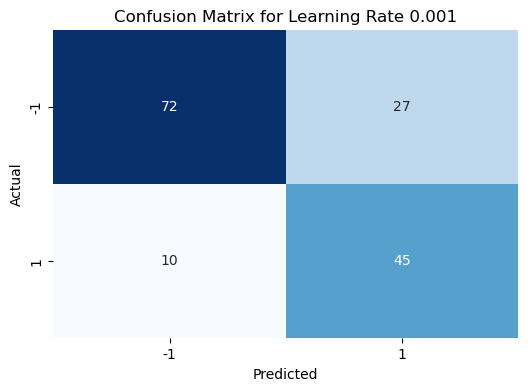

------------------------------------------------------------
Training with Learning Rate: 0.005
Learning Rate: 0.005, Test Accuracy: 0.7597
              precision    recall  f1-score   support

          -1       0.88      0.73      0.80        99
           1       0.62      0.82      0.71        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.79      0.76      0.76       154



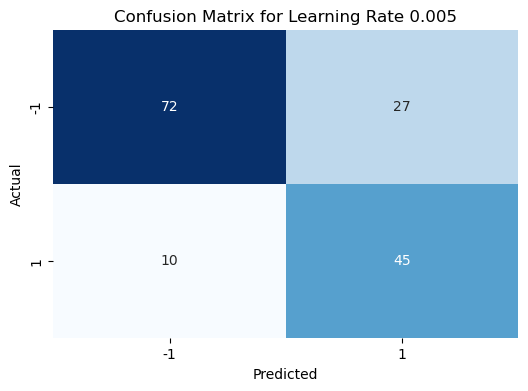

------------------------------------------------------------
Training with Learning Rate: 0.01
Learning Rate: 0.01, Test Accuracy: 0.7597
              precision    recall  f1-score   support

          -1       0.88      0.73      0.80        99
           1       0.62      0.82      0.71        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.79      0.76      0.76       154



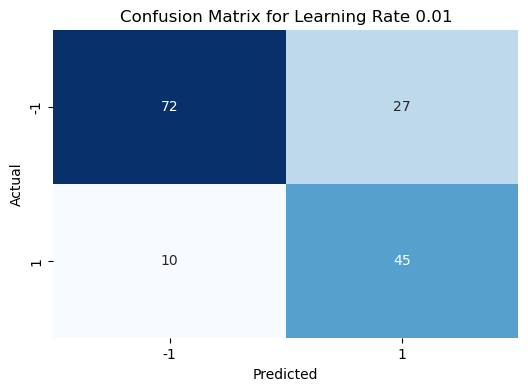

------------------------------------------------------------
Training with Learning Rate: 0.05
Learning Rate: 0.05, Test Accuracy: 0.7597
              precision    recall  f1-score   support

          -1       0.88      0.73      0.80        99
           1       0.62      0.82      0.71        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.79      0.76      0.76       154



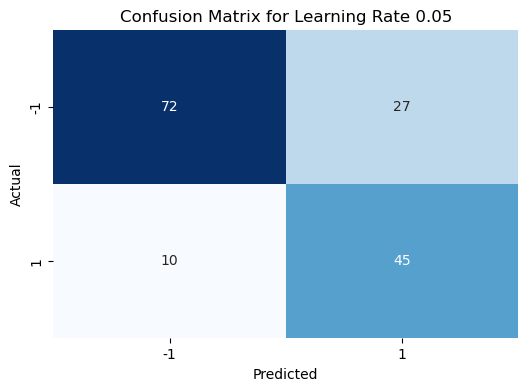

------------------------------------------------------------
Training with Learning Rate: 0.1
Learning Rate: 0.1, Test Accuracy: 0.7597
              precision    recall  f1-score   support

          -1       0.88      0.73      0.80        99
           1       0.62      0.82      0.71        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.79      0.76      0.76       154



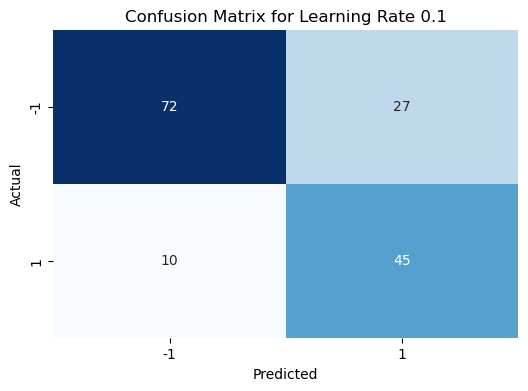

------------------------------------------------------------


In [235]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000, verbose=False, class_weights=None):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.verbose = verbose
        self.class_weights = class_weights  # Allow setting custom class weights

    def _sign(self, x):
        """Activation function - sign function for Perceptron"""
        return np.where(x >= 0, 1, -1)

    def _calculate_class_weights(self, y):
        """Calculate class weights based on the class distribution"""
        if self.class_weights is None:
            n_class_0 = np.sum(y == -1)
            n_class_1 = np.sum(y == 1)
            self.class_weights = {1: n_class_0 / n_class_1, -1: 1.0}

    def _update_weights(self, x_i, y_true):
        """Update the weights and bias using the perceptron rule with class weighting"""
        update = self.lr * self.class_weights[y_true] * y_true
        self.weights += update * x_i
        self.bias += update

    def fit(self, X, y):
        """Train the Perceptron model"""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Calculate class weights based on the distribution of y
        self._calculate_class_weights(y)

        for epoch in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._sign(linear_output)

                if y_predicted != y[idx]:
                    self._update_weights(x_i, y[idx])

            # If verbose, print the progress at each epoch
            if self.verbose:
                y_train_pred = self.predict(X)
                accuracy = accuracy_score(y, y_train_pred)
                print(f"Epoch {epoch+1}/{self.n_iters}, Training Accuracy: {accuracy:.4f}")

    def predict(self, X):
        """Make predictions on input data X"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self._sign(linear_output)


# Hyperparameter tuning for learning rates
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]

for lr in learning_rates:
    print(f"Training with Learning Rate: {lr}")
    
    # Initializing the Perceptron with the current learning rate and enabling class weighting
    perceptron = Perceptron(learning_rate=lr, n_iters=1000, verbose=False, class_weights=None)
    
    # Training the model
    perceptron.fit(X_train, y_train)
    
    # Making predictions on the test set
    y_pred = perceptron.predict(X_test)
    
    # Printing the learning rate and the corresponding accuracy
    print(f"Learning Rate: {lr}, Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    # Printing detailed classification report for each learning rate
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plotting the confusion matrix using seaborn heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[-1, 1], yticklabels=[-1, 1])
    plt.title(f'Confusion Matrix for Learning Rate {lr}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("-" * 60)

In this test, the model's performance remained consistent across all learning rates, with an accuracy of 75.97% and identical precision, recall, and F1-scores for each rate tested (0.001, 0.005, 0.01, 0.05, and 0.1). This suggests that the Perceptron algorithm is relatively insensitive to the choice of learning rate within this range for this particular dataset. The consistent performance implies that the model reaches convergence early, and further adjustments to the learning rate do not significantly impact the final outcome as the default settings may already be close to optimal for this problem. 

## Test 5: Experimenting with Kernal Perceptron

In [236]:
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
class KernelPerceptron:
    def __init__(self, n_iters=1000, kernel="poly", gamma=1, degree=3, coef0=1, verbose=False):
        self.n_iters = n_iters
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.verbose = verbose
        self.alphas = None
        self.support_vectors = None
        self.support_labels = None

    def _kernel_function(self, X, Y):
        """Apply the kernel function"""
        if self.kernel == "poly":
            return polynomial_kernel(X, Y, degree=self.degree, coef0=self.coef0, gamma=self.gamma)
        elif self.kernel == "rbf":
            return rbf_kernel(X, Y, gamma=self.gamma)

    def fit(self, X, y):
        """Train the Kernel Perceptron model"""
        n_samples = X.shape[0]
        self.alphas = np.zeros(n_samples)
        self.support_vectors = X
        self.support_labels = y

        for epoch in range(self.n_iters):
            for i in range(n_samples):
                kernel_output = np.dot(self.alphas * self.support_labels, self._kernel_function(self.support_vectors, X[i].reshape(1, -1)))
                y_pred = np.sign(kernel_output)

                if y_pred != y[i]:
                    self.alphas[i] += 1  # Update alpha if there's a misclassification

            if self.verbose:
                y_train_pred = self.predict(X)
                accuracy = accuracy_score(y, y_train_pred)
                print(f"Epoch {epoch+1}/{self.n_iters} - Training Accuracy: {accuracy:.4f}")

    def predict(self, X):
        """Make predictions on input data X"""
        kernel_output = np.dot(self.alphas * self.support_labels, self._kernel_function(self.support_vectors, X))
        return np.sign(kernel_output)

# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Choosing kernel type: "poly" for polynomial
kernel_type = 'poly'  

# Initializing the Kernel Perceptron
kernel_perceptron = KernelPerceptron(n_iters=1000, kernel=kernel_type, gamma=1, degree=3, coef0=1, verbose=True)

# Training the Kernel Perceptron with resampled data
kernel_perceptron.fit(np.array(X_resampled), np.array(y_resampled))

# Making predictions on the test set
y_pred = kernel_perceptron.predict(np.array(X_test))


Epoch 1/1000 - Training Accuracy: 0.7756
Epoch 2/1000 - Training Accuracy: 0.7756
Epoch 3/1000 - Training Accuracy: 0.7905
Epoch 4/1000 - Training Accuracy: 0.7905
Epoch 5/1000 - Training Accuracy: 0.8292
Epoch 6/1000 - Training Accuracy: 0.8117
Epoch 7/1000 - Training Accuracy: 0.8192
Epoch 8/1000 - Training Accuracy: 0.8067
Epoch 9/1000 - Training Accuracy: 0.8142
Epoch 10/1000 - Training Accuracy: 0.7980
Epoch 11/1000 - Training Accuracy: 0.8117
Epoch 12/1000 - Training Accuracy: 0.8105
Epoch 13/1000 - Training Accuracy: 0.8080
Epoch 14/1000 - Training Accuracy: 0.8267
Epoch 15/1000 - Training Accuracy: 0.8229
Epoch 16/1000 - Training Accuracy: 0.8180
Epoch 17/1000 - Training Accuracy: 0.8117
Epoch 18/1000 - Training Accuracy: 0.8354
Epoch 19/1000 - Training Accuracy: 0.8167
Epoch 20/1000 - Training Accuracy: 0.8180
Epoch 21/1000 - Training Accuracy: 0.8167
Epoch 22/1000 - Training Accuracy: 0.8142
Epoch 23/1000 - Training Accuracy: 0.8117
Epoch 24/1000 - Training Accuracy: 0.8142
E


Test Accuracy (Kernel Perceptron with SMOTE): 0.6494
              precision    recall  f1-score   support

          -1       0.78      0.63      0.70        99
           1       0.51      0.69      0.58        55

    accuracy                           0.65       154
   macro avg       0.65      0.66      0.64       154
weighted avg       0.69      0.65      0.66       154



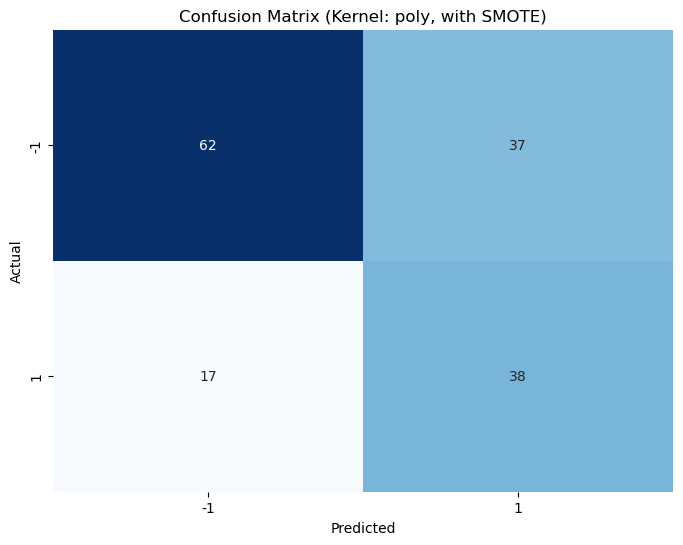

In [237]:
# Evaluate the Kernel Perceptron
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy (Kernel Perceptron with SMOTE): {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Kernel: {kernel_type}, with SMOTE)')
plt.show()

The Kernel Perceptron using a polynomial kernel and SMOTE for class balancing achieved an accuracy of 0.6494. The model displayed a strong recall for the minority class (1), at 69%, which is a significant improvement from the traditional Perceptron, likely due to the application of SMOTE, which balanced the dataset by synthetically generating samples for the minority class. However, precision for class 1 is lower (51%), indicating that the model misclassifies some instances of the majority class (class -1) as the minority class. This is evidenced by the confusion matrix, where 37 out of 99 majority class instances are misclassified as class 1. The application of the kernel introduces non-linear decision boundaries, which explains some improvement in capturing the minority class. However, the trade-off here is the model's tendency to misclassify the majority class, which slightly lowers overall accuracy. 

## Experimenting with Multi-layer Perceptron (MLP) 

## Test 6:  Relu Activation Function

In [257]:
# Defining the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100),  # 1 layer with 100 neurones ;
                    activation='relu',            
                    solver='adam',                
                    alpha=0.0001,                 # L2 penalty (regularization term)
                    learning_rate='adaptive',     # Adaptive learning rate
                    max_iter=1000,                # Number of iterations
                    random_state=42,              # For reproducibility
                    verbose=False)     


# Fitting the MLP model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)


MLP Test Accuracy (Relu Activation Function): 0.7143
              precision    recall  f1-score   support

          -1       0.79      0.76      0.77        99
           1       0.59      0.64      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.72       154



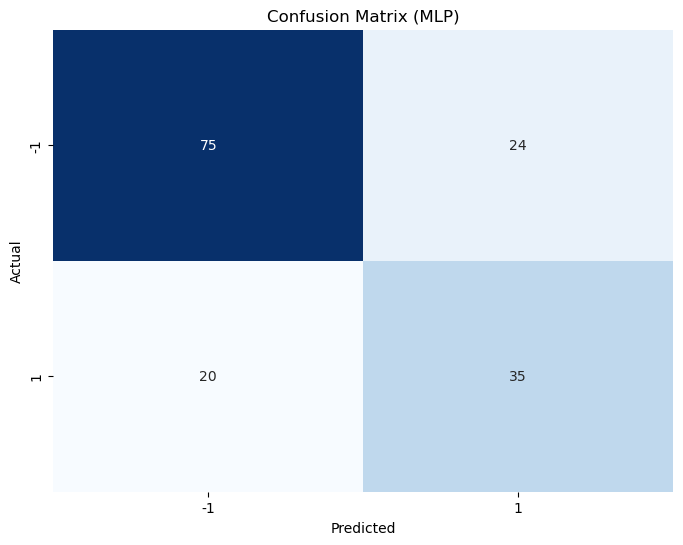

In [258]:
# Evaluating the MLP model
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"\nMLP Test Accuracy (Relu Activation Function): {mlp_accuracy:.4f}")
print(classification_report(y_test, y_pred_mlp))

# Generating and plotting confusion matrix
mlp_conf_matrix = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (MLP)')
plt.show()

In comparing the performance of the traditional perceptron model and a one-layer MLP with 100 neurons and ReLU activation, we observe that the perceptron achieved a test accuracy of 0.7597, while the MLP achieved a slightly lower accuracy of 0.7143. The perceptron model shows better precision, particularly in predicting the negative class (-1), with a precision of 0.88 compared to the MLP's precision of 0.79. Additionally, the perceptron performed better on recall for the positive class (1), reaching 0.82, whereas the MLP scored 0.64. The perceptron’s relatively better performance may be attributed to the specific nature of the dataset and problem, where linear separability might favor a simpler algorithm. In contrast, the MLP, while introducing non-linearity through its ReLU activation function and having more complexity, may not be as well-suited due to the possible need for more tuning to outperform the perceptron for this specific task.

## Test 7: Experimenting with lesser neurones and sgd optimizer

In [263]:
# Defining the MLP model with more layers
mlp = MLPClassifier(hidden_layer_sizes=(10),
                    activation='relu',            
                    solver='sgd',                
                    alpha=0.0001,                 # L2 penalty (regularization term)
                    learning_rate='adaptive',     # Adaptive learning rate
                    max_iter=1000,                # Number of iterations
                    random_state=42,              # For reproducibility
                    verbose=False)     


# Fitting the MLP model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)


MLP Test Accuracy (Relu Activation Function): 0.7532
              precision    recall  f1-score   support

          -1       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



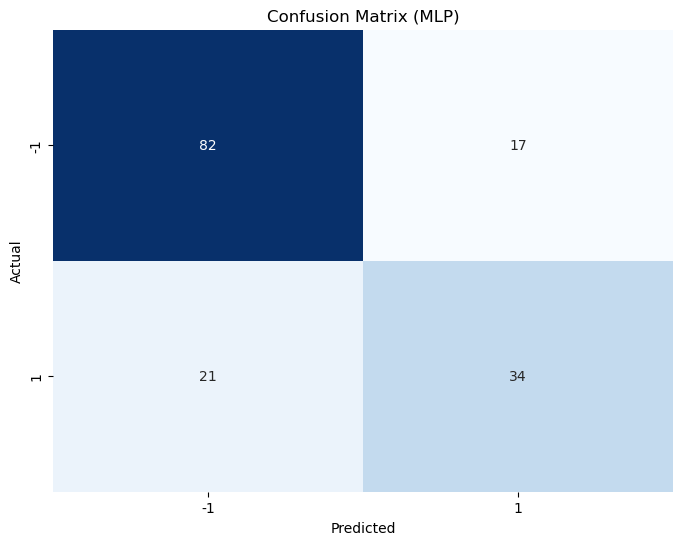

In [264]:
# Evaluating the MLP model
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"\nMLP Test Accuracy (Relu Activation Function): {mlp_accuracy:.4f}")
print(classification_report(y_test, y_pred_mlp))

# Generating and plotting confusion matrix
mlp_conf_matrix = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (MLP)')
plt.show()

In this test, reducing the MLP to 10 neurons and switching to the SGD optimizer resulted in an accuracy of 0.7532, which is slightly lower than the perceptron's 0.7597. The precision and recall are relatively balanced, especially for the negative class (-1), but the positive class (1) struggles more with recall. This indicates that while the reduced complexity helped maintain performance close to the perceptron, the simpler MLP may still not fully capture non-linear patterns or may need further optimization with hyperparameters to outperform the perceptron.

## Test 8: Experimenting with different  activation functions

## Tanh Activation Function


MLP Test Accuracy (3 layers + Tanh Activation Function): 0.7792
              precision    recall  f1-score   support

          -1       0.81      0.86      0.83        99
           1       0.71      0.64      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



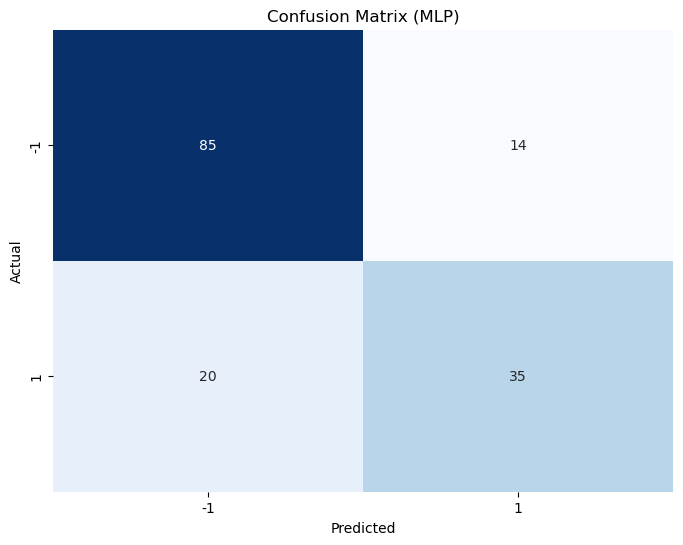

In [265]:

# Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(10), 
                    activation='tanh',           
                    solver='sgd',                # Optimizer: 'adam', 'sgd', etc.
                    alpha=0.0001,                 # L2 penalty (regularization term)
                    learning_rate='adaptive',     # Adaptive learning rate
                    max_iter=1000,                # Number of iterations
                    random_state=42,              # For reproducibility
                    verbose=False)    

# Fitting the MLP model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)

# Evaluating the MLP model
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"\nMLP Test Accuracy (3 layers + Tanh Activation Function): {mlp_accuracy:.4f}")
print(classification_report(y_test, y_pred_mlp))

# Generate and plot confusion matrix
mlp_conf_matrix = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (MLP)')
plt.show()

## Logistic Activation Function


MLP Test Accuracy (logistic Activation Function): 0.7532
              precision    recall  f1-score   support

          -1       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



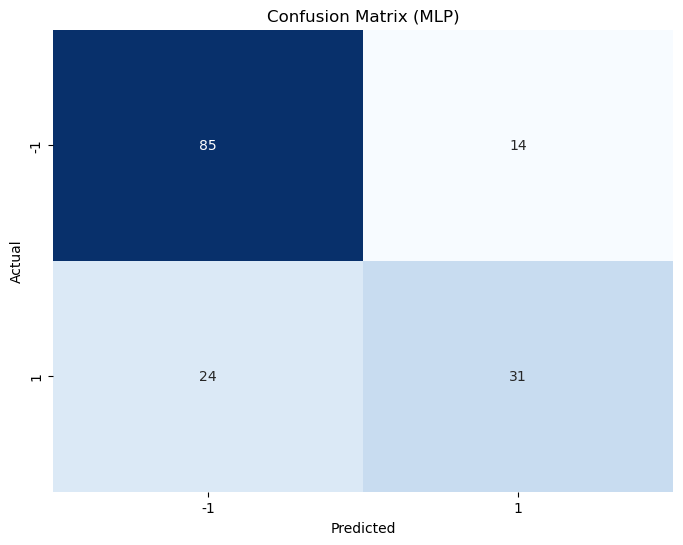

In [266]:
# Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(10), 
                    activation='logistic',        
                    solver='sgd',                # Optimizer: 'adam', 'sgd', etc.
                    alpha=0.0001,                 # L2 penalty (regularization term)
                    learning_rate='adaptive',     # Adaptive learning rate
                    max_iter=1000,                # Number of iterations
                    random_state=42,              # For reproducibility
                    verbose=False)    

# Fitting the MLP model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)
# Evaluating the MLP model
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"\nMLP Test Accuracy (logistic Activation Function): {mlp_accuracy:.4f}")
print(classification_report(y_test, y_pred_mlp))

# Generate and plot confusion matrix
mlp_conf_matrix = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (MLP)')
plt.show()

In these experiments with different activation functions, the **tanh** activation function yielded an accuracy of **0.7792**, outperforming both the perceptron and previous MLP models. This improvement is reflected in the balanced performance across both classes, particularly with better recall for class 1 compared to earlier models. On the other hand, the **logistic (sigmoid)** activation function resulted in an accuracy of **0.7532**, similar to previous MLP models, but with a slight decrease in the recall for class 1. These results suggest that the **tanh** function, which allows for non-linear transformations without suffering from saturation as much as logistic, captures more complex patterns in the data, leading to better overall performance in this case.

## Comaparison of test results:

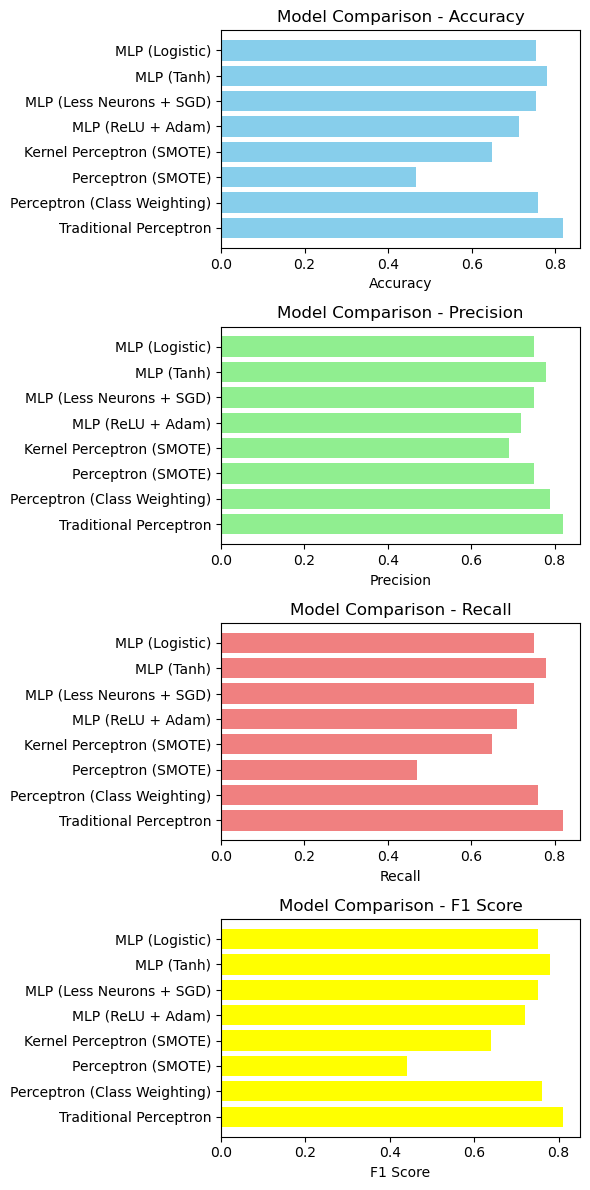

In [270]:
# Define the model names
model_names = ['Traditional Perceptron', 'Perceptron (Class Weighting)', 'Perceptron (SMOTE)', 'Kernel Perceptron (SMOTE)',
               'MLP (ReLU + Adam)', 'MLP (Less Neurons + SGD)', 'MLP (Tanh)', 'MLP (Logistic)']

# Define the corresponding metrics for each model (accuracy, precision, recall, f1-score)
accuracy = [0.8182, 0.7597, 0.4675, 0.6494, 0.7143, 0.7532, 0.7792, 0.7532]
precision = [0.82, 0.79, 0.75, 0.69, 0.72, 0.75, 0.78, 0.75]
recall = [0.82, 0.76, 0.47, 0.65, 0.71, 0.75, 0.78, 0.75]
f1_score = [0.81, 0.76, 0.44, 0.64, 0.72, 0.75, 0.78, 0.75]

# Create figure and axes for the subplots, one after another (4 vertical subplots)
fig, ax = plt.subplots(4, 1, figsize=(6, 12))

# Accuracy bar chart
ax[0].barh(model_names, accuracy, color='skyblue')
ax[0].set_title('Model Comparison - Accuracy')
ax[0].set_xlabel('Accuracy')

# Precision bar chart
ax[1].barh(model_names, precision, color='lightgreen')
ax[1].set_title('Model Comparison - Precision')
ax[1].set_xlabel('Precision')

# Recall bar chart
ax[2].barh(model_names, recall, color='lightcoral')
ax[2].set_title('Model Comparison - Recall')
ax[2].set_xlabel('Recall')

# F1 Score bar chart
ax[3].barh(model_names, f1_score, color='yellow')
ax[3].set_title('Model Comparison - F1 Score')
ax[3].set_xlabel('F1 Score')

# Adjust layout for better spacing
plt.tight_layout()

# Display the charts
plt.show()


### Observations:
1. **Accuracy**: 
   - The **Traditional Perceptron** model has the highest accuracy (0.82), outperforming all the other methods.
   - The **MLP with Tanh activation** and **MLP with Logistic activation** also perform well, with accuracies of around 0.78 and 0.75, respectively.
   - The **Perceptron with SMOTE** performed the worst, showing a significant drop in accuracy (0.47).

2. **Precision**: 
   - The **Traditional Perceptron** and **Perceptron with Class Weighting** have the highest precision, which indicates they correctly predicted the positive class more often compared to the others.
   - **MLP models** (Logistic, Tanh, and others) showed comparable precision values, slightly below the base perceptron model.
   - **Perceptron with SMOTE** and **Kernel Perceptron with SMOTE** had the lowest precision scores.

3. **Recall**: 
   - **Traditional Perceptron** has the highest recall, which means it was better at identifying positive cases.
   - **Perceptron with Class Weighting** and **MLP with ReLU + Adam** also performed well in recall.
   - **Perceptron with SMOTE** showed the lowest recall, reflecting its poor ability to detect positive instances.

4. **F1-Score**: 
   - The **Traditional Perceptron** has the highest F1 score (0.81), showing the best balance between precision and recall.
   - **MLP with Tanh** and **Logistic activation** also achieved competitive F1 scores, showing that they balanced precision and recall reasonably well.
   - **Perceptron with SMOTE** had the lowest F1 score, further confirming its underperformance.

### Best Method:
- The **Traditional Perceptron** still stands out as the best method overall, with the highest accuracy, precision, recall, and F1-score. None of the alternate methods (MLP, kernel perceptron, SMOTE-based models) showed a significant improvement over the base model.

### Conclusion:
- The performance of the base model (**Traditional Perceptron**) was not significantly improved by any of the other tested methods. While the MLP models with different activation functions came close, the traditional perceptron remains the most robust model in this comparison. Some methods, like **Perceptron with SMOTE**, performed significantly worse, likely due to issues in balancing the class distribution.